In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder


%matplotlib inline

In [4]:
df=pd.read_csv("Churn_Modelling.csv")

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.drop(['RowNumber'],axis=1,inplace=True)

In [9]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
lb = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = lb.fit_transform(df[column])

In [12]:
df['Gender'].value_counts()

Gender
1    5457
0    4543
Name: count, dtype: int64

In [13]:
df['HasCrCard'].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

In [14]:
df['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

In [15]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [16]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))


We have 13 numerical features : ['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

We have 0 categorical features : []


In [17]:
df['EstimatedSalary'].mean()

100090.239881

In [18]:
## Exited Percentage for Pie Chart
percentage_exit=df['Exited'].value_counts(normalize=True)*100
## Gender Percentage for Pie Chart
percentage_gender=df['Gender'].value_counts(normalize=True)*100

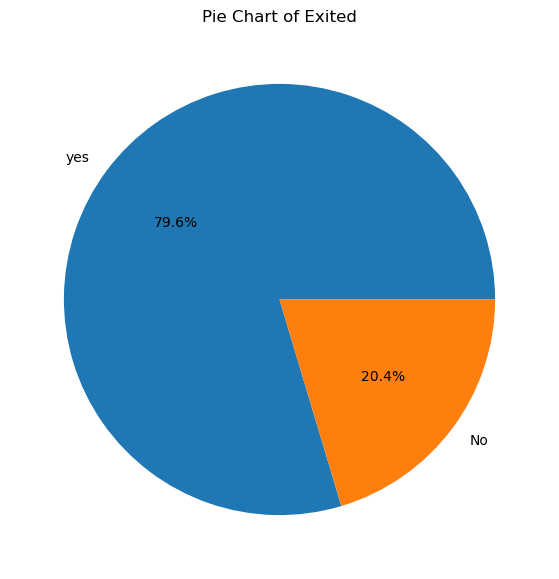

In [19]:
# plotting piechart
classlabels=["yes","No"]
plt.figure(figsize=(12,7))
plt.pie(percentage_exit,labels=classlabels,autopct='%1.1f%%')
plt.title("Pie Chart of Exited")
plt.show()

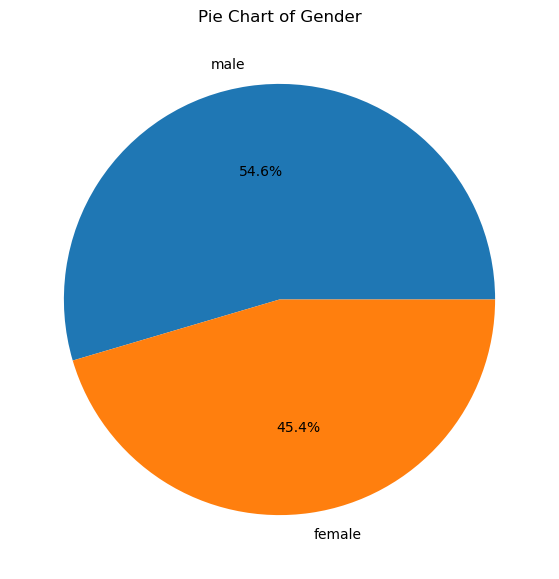

In [20]:
# plotting piechart
classlabels=["male","female"]
plt.figure(figsize=(12,7))
plt.pie(percentage_gender,labels=classlabels,autopct='%1.1f%%')
plt.title("Pie Chart of Gender")
plt.show()

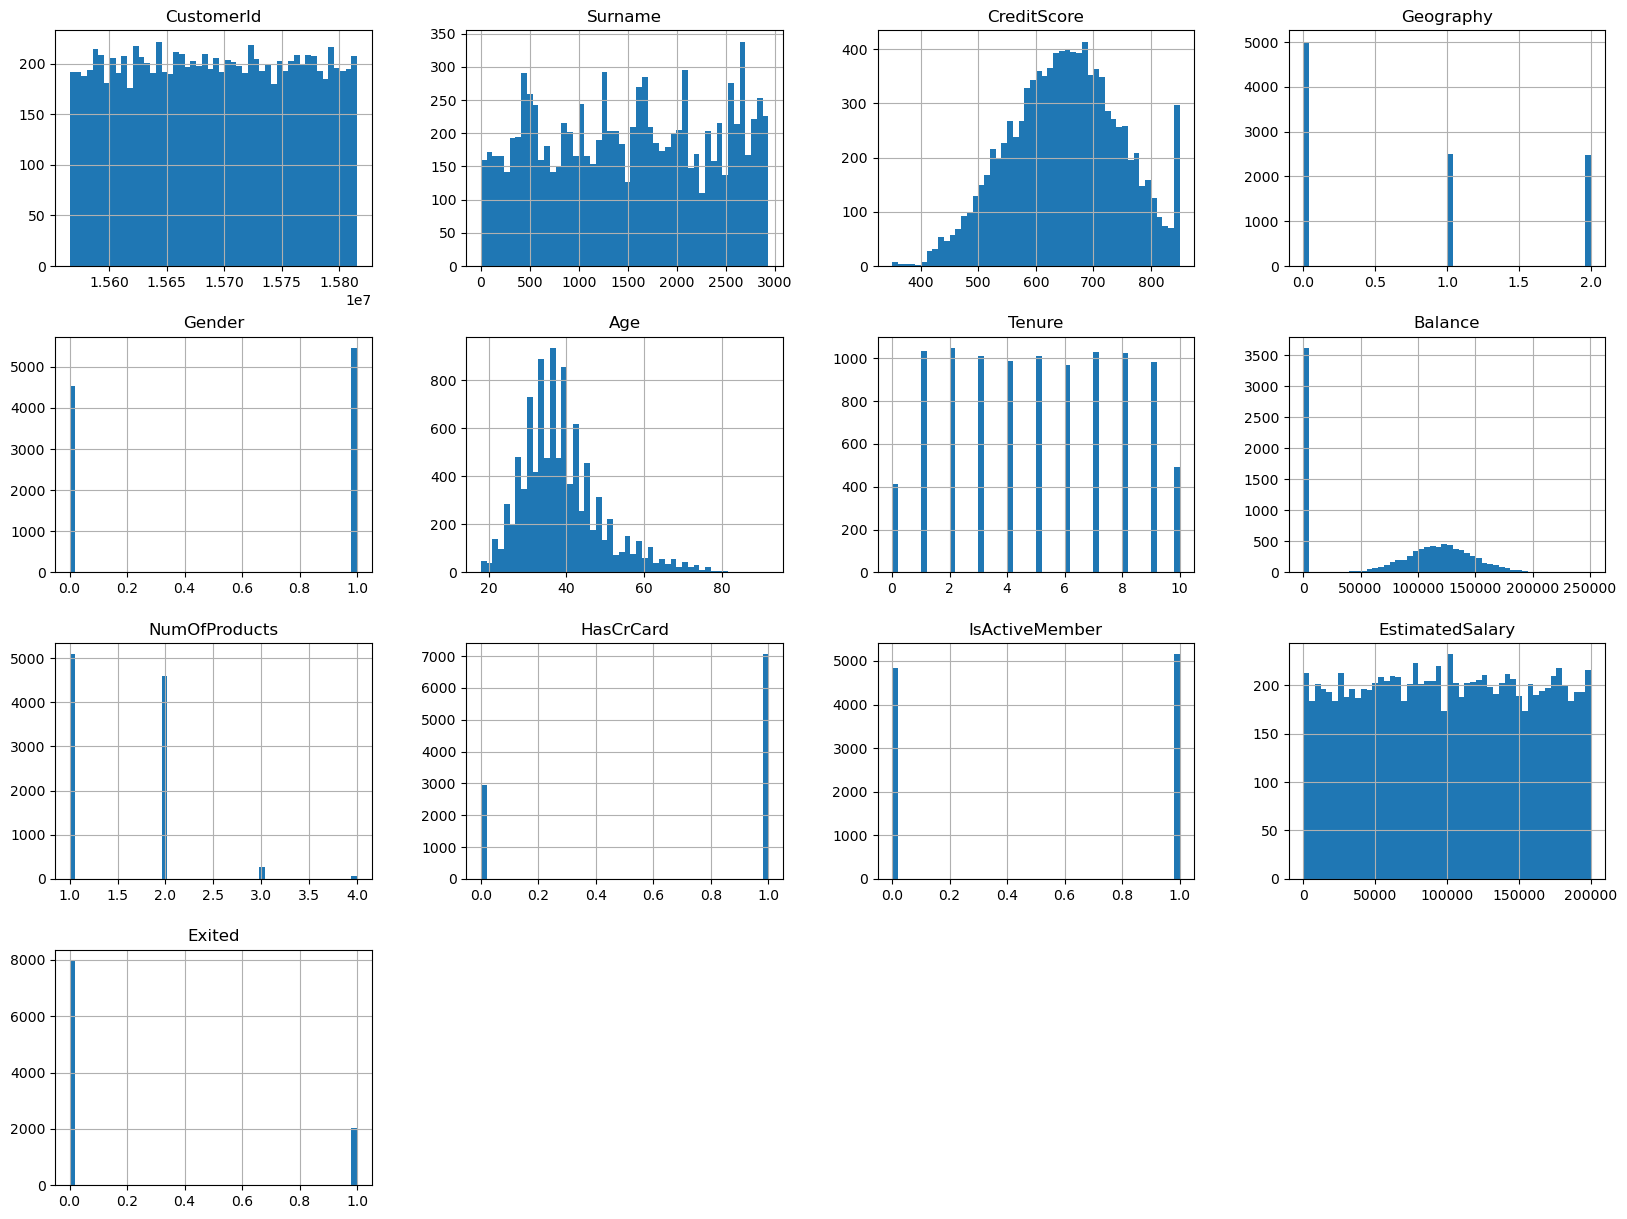

In [21]:
## Plot desnity plot for all features
df.hist(bins=50,figsize=(20,15))
plt.show()

Text(0.5, 1.0, 'Exited analysis of Different Geographical region')

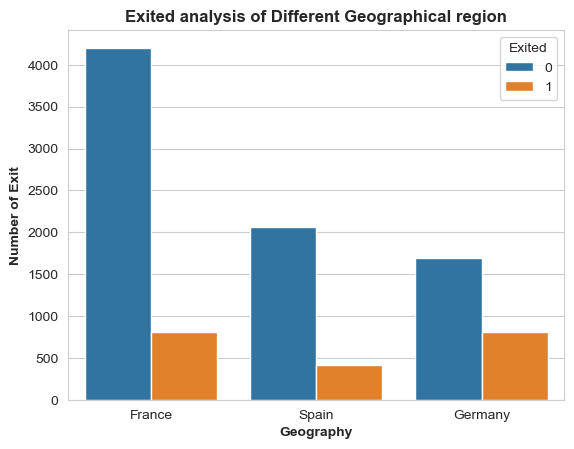

In [22]:
## Monthly Fire Analysis
df_temp=pd.read_csv('Churn_Modelling.csv')
sns.set_style('whitegrid')
sns.countplot(x='Geography',hue='Exited',data=df_temp)
plt.ylabel('Number of Exit',weight='bold')
plt.xlabel('Geography',weight='bold')
plt.title("Exited analysis of Different Geographical region",weight='bold')

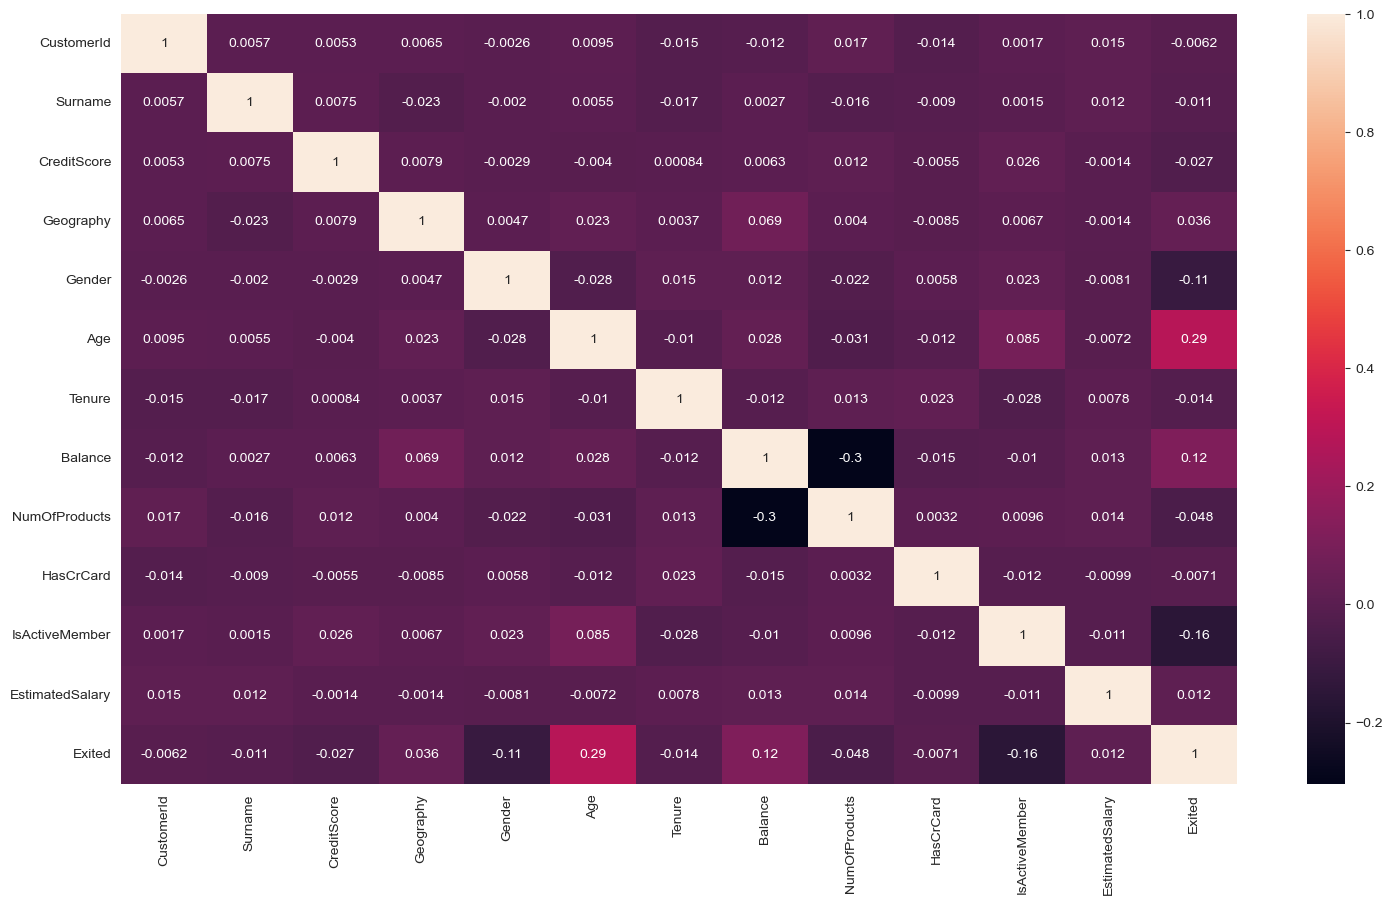

In [23]:
correlation = df.corr()

#palette = sns.color_palette("viridis", as_cmap=True)
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True)
plt.show()